In [38]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import utility

reload(utility)
from utility import *

from scipy.optimize import curve_fit
from SecondaryValue import SecondaryValue
import pandas as pd

In [59]:
area = 26  # cm^2
int_ein = 100e-3 # w/cm^2

In [171]:
ccurves = pd.DataFrame(columns=['desc', 'curve', 'area', 'j_c', 'u_cc', 'ff', 'eta', 'p_mlp', 'u_mlp'])
for point, desc, a in [
        ('a', '3x3_hell', 6),
        ('b_1', '3x3_schaltung_1', 6),
        ('b_2', '3x3_schaltung_2', 6),
        ('b_31', '3x3_schaltung_3', 6),
        ('b_41', '3x3_schaltung_4', 6),
        ('c_1', '3x3_verschattung_1', 6),
        ('c_2', '3x3_verschattung_2', 6),
        ('c_3', '3x3_verschattung_3', 6),
        ('d_1', 'huge_hell', 13),
        ('d_2', 'huge_verbraucher', 13)]:
        row = pd.Series({'desc': desc, 'area': a*area, 'curve': parse_ccurve(f'../messungen/191114_OM_VB/3_{point}.dat')})
        
        ccurves.loc[desc] = pd.concat((row, pd.Series(analyze_ccurve(row['curve'], row['area'], int_ein))))


# Plot all ccurves

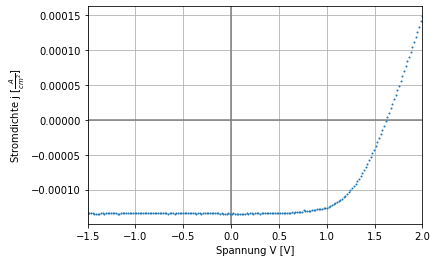

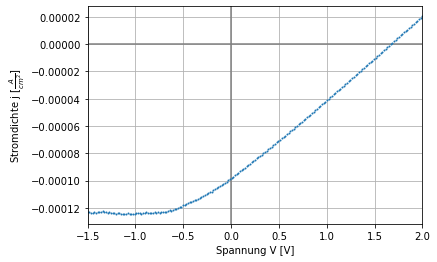

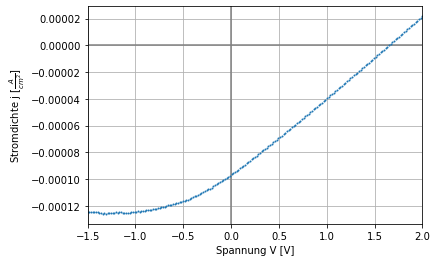

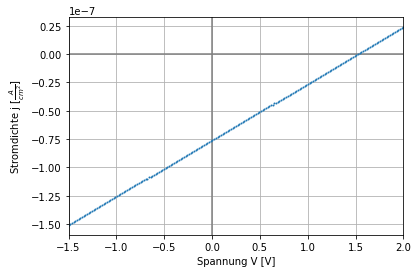

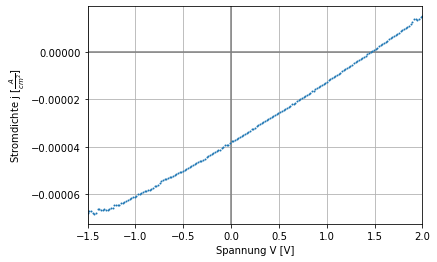

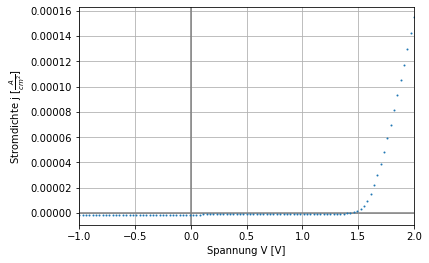

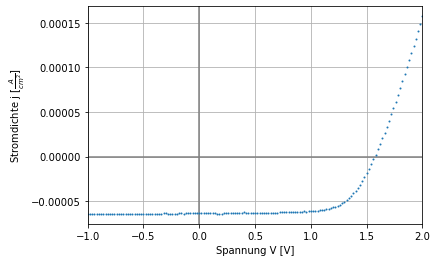

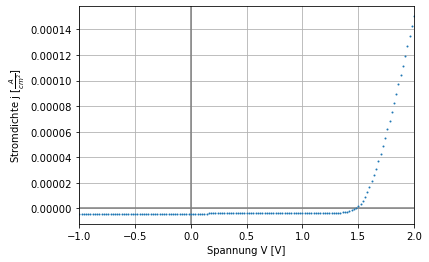

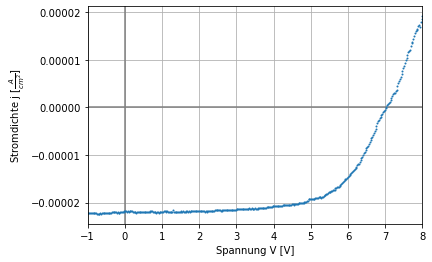

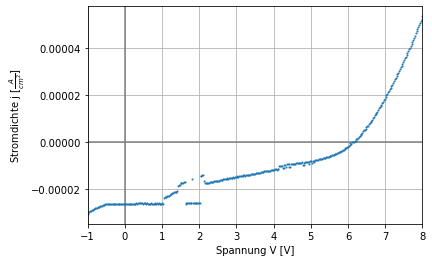

In [158]:
for _, curve in ccurves.iterrows():
    plot_ccurve(curve['curve'], area=area * curve['area'], save=f'C/{curve["desc"]}.pdf')

In [173]:
ccurves.loc['huge_hell']

desc                                             huge_hell
curve    [[-1.0, -0.1947314], [-0.9775, -0.1942969], [-...
area                                                   338
j_c                                            0.000567871
u_cc                                               7.02243
ff                                                0.653348
eta                                              0.0260545
p_mlp                                             0.880641
u_mlp                                               5.3225
Name: huge_hell, dtype: object